## Table of contents

- [Preprocessing](#Preprocessing)
    + [1. 결측치 제거](#Missing-Value-Handling)
    + [2. 중복값 제거](#Remove-duplicates)

- [Analyze](#Analyze)
    + [자치구별 grdp와 학교 및 학원/교습소 수](#grdp와-교육열의-관계)

- [Visualize](#Visualize)
    + [1.자치구별 grdp와 학교 총 개수 시각화](#1.자치구별-grdp와-학교-총-개수-시각화)
    + [2. 자치구별 grdp와 자치구별 학원/교습소 수](#2.자치구별-grdp와-자치구별-학원/교습소-수)


### Preprocessing
전처리 수행(결측값 처리, 중복값 처리, 이상치 처리 등)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

In [2]:
# Main Data
school = pd.read_csv('./data/서울특별시 학교 기본정보.csv')
grdp=pd.read_csv('./data/자치구별 1인당 지역내총생산 및 수준지수.csv')
#전처리 데이터 수합 엑셀 파일 중, '학원교습소정보' 사용
hello= pd.read_excel('./data/helloworld_data_set.xlsx',sheet_name=None)
print(hello.keys())
locals().update(hello)
#학원교습소정보를 academy 변수에 지정
academy= hello['학원교습소정보']

dict_keys(['학원교습소정보', '학교기본정보', '주민등록연앙인구통계', '가구행태별가구수', '유치원정보', '유치원통학버스정보', 'GRDP'])


### Missing Value Handling

In [3]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   학교종류명        3867 non-null   object
 1   설립구분         3867 non-null   object
 2   학교명          3867 non-null   object
 3   관할조직명        3867 non-null   object
 4   도로명주소        3851 non-null   object
 5   도로명상세주소      3851 non-null   object
 6   남녀공학구분명      3867 non-null   object
 7   고등학교구분명      2549 non-null   object
 8   산업체특별학급존재여부  3867 non-null   object
 9   고등학교일반실업구분명  3837 non-null   object
 10  특수목적고등학교계열명  190 non-null    object
 11  입시전후기구분명     3867 non-null   object
 12  주야구분명        3867 non-null   object
 13  설립일자         3867 non-null   int64 
 14  개교기념일        3867 non-null   int64 
 15  시도교육청명       3867 non-null   object
 16  주야과정         2800 non-null   object
 17  계열명          2799 non-null   object
 18  학과명          2800 non-null   object
dtypes: int64(2), object(17)
mem

In [4]:
school.head()

,학교종류명,설립구분,학교명,관할조직명,도로명주소,도로명상세주소,남녀공학구분명,고등학교구분명,산업체특별학급존재여부,고등학교일반실업구분명,특수목적고등학교계열명,입시전후기구분명,주야구분명,설립일자,개교기념일,시도교육청명,주야과정,계열명,학과명
0,각종학교(중),사립,선화예술중학교,서울특별시성동광진교육지원청,서울특별시 광진구 천호대로 664,/ 선화예술중고등학교 (능동),남여공학,NaN,N,일반계,NaN,전기,주간,19731201,19730705,서울특별시교육청,NaN,NaN,NaN
1,초등학교,공립,서울숭신초등학교,서울특별시성동광진교육지원청,서울특별시 성동구 마장로 161,(하왕십리동),남여공학,NaN,N,일반계,NaN,전기,주간,19590403,19590403,서울특별시교육청,NaN,NaN,NaN
2,중학교,공립,행당중학교,서울특별시성동광진교육지원청,서울특별시 성동구 왕십리로 189,(행당동/행당중학교),남여공학,NaN,N,일반계,NaN,전기,주간,19680806,19681002,서울특별시교육청,NaN,NaN,NaN
3,중학교,사립,한양대학교사범대학부속중학교,서울특별시성동광진교육지원청,서울특별시 성동구 마조로 42,(사근동/한양사대부속중?고등학교),남여공학,NaN,N,일반계,NaN,전기,주간,19600118,19600118,서울특별시교육청,NaN,NaN,NaN
4,중학교,공립,자양중학교,서울특별시성동광진교육지원청,서울특별시 광진구 뚝섬로41길 33,(자양동/서울자양중학교),남여공학,NaN,N,일반계,NaN,전기,주간,19840301,19840301,서울특별시교육청,NaN,NaN,NaN


In [5]:
school.isnull().sum()

학교종류명             0
설립구분              0
학교명               0
관할조직명             0
도로명주소            16
도로명상세주소          16
남녀공학구분명           0
고등학교구분명        1318
산업체특별학급존재여부       0
고등학교일반실업구분명      30
특수목적고등학교계열명    3677
입시전후기구분명          0
주야구분명             0
설립일자              0
개교기념일             0
시도교육청명            0
주야과정           1067
계열명            1068
학과명            1067
dtype: int64

In [6]:
# 해당 열들은 대부분의 값이 비어있음  -> 유용하지 않은 열이므로 삭제 
# 고등학교구분명, 특수목적고등학교계열명, 계열명, 학과명
del school['고등학교구분명']
del school['특수목적고등학교계열명']
del school['계열명']
del school['학과명']
del school['도로명상세주소']

In [7]:
school.isnull().sum()

학교종류명             0
설립구분              0
학교명               0
관할조직명             0
도로명주소            16
남녀공학구분명           0
산업체특별학급존재여부       0
고등학교일반실업구분명      30
입시전후기구분명          0
주야구분명             0
설립일자              0
개교기념일             0
시도교육청명            0
주야과정           1067
dtype: int64

In [8]:
school['자치구']= school['도로명주소'].str.split().str[1] # 자치구만 뽑아내기
school['자치구']

0       광진구
1       성동구
2       성동구
3       성동구
4       광진구
       ... 
3862    강남구
3863    마포구
3864    종로구
3865    종로구
3866    노원구
Name: 자치구, Length: 3867, dtype: object

In [9]:
school.head()

,학교종류명,설립구분,학교명,관할조직명,도로명주소,남녀공학구분명,산업체특별학급존재여부,고등학교일반실업구분명,입시전후기구분명,주야구분명,설립일자,개교기념일,시도교육청명,주야과정,자치구
0,각종학교(중),사립,선화예술중학교,서울특별시성동광진교육지원청,서울특별시 광진구 천호대로 664,남여공학,N,일반계,전기,주간,19731201,19730705,서울특별시교육청,NaN,광진구
1,초등학교,공립,서울숭신초등학교,서울특별시성동광진교육지원청,서울특별시 성동구 마장로 161,남여공학,N,일반계,전기,주간,19590403,19590403,서울특별시교육청,NaN,성동구
2,중학교,공립,행당중학교,서울특별시성동광진교육지원청,서울특별시 성동구 왕십리로 189,남여공학,N,일반계,전기,주간,19680806,19681002,서울특별시교육청,NaN,성동구
3,중학교,사립,한양대학교사범대학부속중학교,서울특별시성동광진교육지원청,서울특별시 성동구 마조로 42,남여공학,N,일반계,전기,주간,19600118,19600118,서울특별시교육청,NaN,성동구
4,중학교,공립,자양중학교,서울특별시성동광진교육지원청,서울특별시 광진구 뚝섬로41길 33,남여공학,N,일반계,전기,주간,19840301,19840301,서울특별시교육청,NaN,광진구


In [10]:
# 결측치 행 제거 
school= school.dropna(subset=['도로명주소', '자치구']) 

In [11]:
school.isnull().sum()

학교종류명             0
설립구분              0
학교명               0
관할조직명             0
도로명주소             0
남녀공학구분명           0
산업체특별학급존재여부       0
고등학교일반실업구분명      30
입시전후기구분명          0
주야구분명             0
설립일자              0
개교기념일             0
시도교육청명            0
주야과정           1067
자치구               0
dtype: int64

In [12]:
school['주야과정'].value_counts(dropna=False)

주간       2738
NaN      1067
야간         42
산업체특별       4
Name: 주야과정, dtype: int64

In [13]:
school['고등학교일반실업구분명'].value_counts(dropna=False)

일반계     2172
전문계     1516
해당없음     133
NaN       30
Name: 고등학교일반실업구분명, dtype: int64

In [14]:
school['고등학교일반실업구분명'] = school['고등학교일반실업구분명'].fillna('기타') #nan값을 기타로 채우기
school['주야과정'] = school['주야과정'].fillna('기타') # nan값을 기타로 채우기

In [15]:
school.isnull().sum()

학교종류명          0
설립구분           0
학교명            0
관할조직명          0
도로명주소          0
남녀공학구분명        0
산업체특별학급존재여부    0
고등학교일반실업구분명    0
입시전후기구분명       0
주야구분명          0
설립일자           0
개교기념일          0
시도교육청명         0
주야과정           0
자치구            0
dtype: int64

### 학교 종류 (초중고로 정리)

In [16]:
# 학교 종류 정리
school['학교종류명'].value_counts()

고등학교             2466
초등학교              611
중학교               390
각종학교(고)           233
특수학교               36
방송통신고등학교           32
평생학교(고)-3년6학기      21
외국인학교              19
평생학교(고)-2년6학기      16
고등기술학교             10
평생학교(중)-2년6학기       6
각종학교(중)             5
평생학교(초)-3년6학기       2
방송통신중학교             1
평생학교(중)-3년6학기       1
각종학교(초)             1
공동실습소               1
Name: 학교종류명, dtype: int64

In [17]:
#이름 바꾸기
school.loc[school['학교종류명'] == '평생학교(고)-2년6학기','학교종류명'] = '고등학교'
school.loc[school['학교종류명'] == '각종학교(고)','학교종류명'] = '고등학교'
school.loc[school['학교종류명'] == '평생학교(고)-3년6학기','학교종류명'] = '고등학교'
school.loc[school['학교종류명'] == '평생학교(중)-2년6학기','학교종류명'] = '중학교'
school.loc[school['학교종류명'] == '각종학교(중)','학교종류명'] = '중학교'
school.loc[school['학교종류명'] == '방송통신고등학교','학교종류명'] = '고등학교'
school.loc[school['학교종류명'] == '평생학교(초)-3년6학기','학교종류명'] = '초등학교'
school.loc[school['학교종류명'] == '고등기술학교','학교종류명'] = '고등학교'
school.loc[school['학교종류명'] == '평생학교(중)-3년6학기','학교종류명'] = '중학교'
school.loc[school['학교종류명'] == '방송통신중학교','학교종류명'] = '중학교'
school.loc[school['학교종류명'] == '공동실습소','학교종류명'] = '고등학교'
school.loc[school['학교종류명'] == '각종학교(초)','학교종류명'] = '초등학교'

In [18]:
school['학교종류명'].value_counts(dropna=False)

고등학교     2779
초등학교      614
중학교       403
특수학교       36
외국인학교      19
Name: 학교종류명, dtype: int64

In [19]:
school.head()

,학교종류명,설립구분,학교명,관할조직명,도로명주소,남녀공학구분명,산업체특별학급존재여부,고등학교일반실업구분명,입시전후기구분명,주야구분명,설립일자,개교기념일,시도교육청명,주야과정,자치구
0,중학교,사립,선화예술중학교,서울특별시성동광진교육지원청,서울특별시 광진구 천호대로 664,남여공학,N,일반계,전기,주간,19731201,19730705,서울특별시교육청,기타,광진구
1,초등학교,공립,서울숭신초등학교,서울특별시성동광진교육지원청,서울특별시 성동구 마장로 161,남여공학,N,일반계,전기,주간,19590403,19590403,서울특별시교육청,기타,성동구
2,중학교,공립,행당중학교,서울특별시성동광진교육지원청,서울특별시 성동구 왕십리로 189,남여공학,N,일반계,전기,주간,19680806,19681002,서울특별시교육청,기타,성동구
3,중학교,사립,한양대학교사범대학부속중학교,서울특별시성동광진교육지원청,서울특별시 성동구 마조로 42,남여공학,N,일반계,전기,주간,19600118,19600118,서울특별시교육청,기타,성동구
4,중학교,공립,자양중학교,서울특별시성동광진교육지원청,서울특별시 광진구 뚝섬로41길 33,남여공학,N,일반계,전기,주간,19840301,19840301,서울특별시교육청,기타,광진구


### Remove duplicates

In [20]:
school.duplicated().sum()

2406

In [21]:
school[school.duplicated()]

,학교종류명,설립구분,학교명,관할조직명,도로명주소,남녀공학구분명,산업체특별학급존재여부,고등학교일반실업구분명,입시전후기구분명,주야구분명,설립일자,개교기념일,시도교육청명,주야과정,자치구
1010,고등학교,공립,덕수고등학교(일반고),서울특별시교육청,서울특별시 송파구 위례북로 10,남여공학,N,일반계,전기,주간,19100413,19100413,서울특별시교육청,주간,송파구
1011,고등학교,공립,덕수고등학교(일반고),서울특별시교육청,서울특별시 송파구 위례북로 10,남여공학,N,일반계,전기,주간,19100413,19100413,서울특별시교육청,주간,송파구
1012,고등학교,공립,덕수고등학교(일반고),서울특별시교육청,서울특별시 송파구 위례북로 10,남여공학,N,일반계,전기,주간,19100413,19100413,서울특별시교육청,주간,송파구
1014,고등학교,공립,용산철도고등학교,서울특별시교육청,서울특별시 용산구 서빙고로 24,남여공학,N,전문계,전기,주간,19630518,19630518,서울특별시교육청,주간,용산구
1015,고등학교,공립,용산철도고등학교,서울특별시교육청,서울특별시 용산구 서빙고로 24,남여공학,N,전문계,전기,주간,19630518,19630518,서울특별시교육청,주간,용산구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,고등학교,국립,국립전통예술고등학교,교육부,서울특별시 금천구 시흥대로38길 62,남여공학,N,일반계,전기,주간,19600513,19600513,서울특별시교육청,주간,금천구
3857,고등학교,국립,국립전통예술고등학교,교육부,서울특별시 금천구 시흥대로38길 62,남여공학,N,일반계,전기,주간,19600513,19600513,서울특별시교육청,주간,금천구
3858,고등학교,국립,국립전통예술고등학교,교육부,서울특별시 금천구 시흥대로38길 62,남여공학,N,일반계,전기,주간,19600513,19600513,서울특별시교육청,주간,금천구
3859,고등학교,국립,국립전통예술고등학교,교육부,서울특별시 금천구 시흥대로38길 62,남여공학,N,일반계,전기,주간,19600513,19600513,서울특별시교육청,주간,금천구


In [22]:
school.shape

(3851, 15)

In [23]:
school.drop_duplicates(inplace=True) 

In [24]:
school.shape

(1445, 15)

In [25]:
school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 3866
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   학교종류명        1445 non-null   object
 1   설립구분         1445 non-null   object
 2   학교명          1445 non-null   object
 3   관할조직명        1445 non-null   object
 4   도로명주소        1445 non-null   object
 5   남녀공학구분명      1445 non-null   object
 6   산업체특별학급존재여부  1445 non-null   object
 7   고등학교일반실업구분명  1445 non-null   object
 8   입시전후기구분명     1445 non-null   object
 9   주야구분명        1445 non-null   object
 10  설립일자         1445 non-null   int64 
 11  개교기념일        1445 non-null   int64 
 12  시도교육청명       1445 non-null   object
 13  주야과정         1445 non-null   object
 14  자치구          1445 non-null   object
dtypes: int64(2), object(13)
memory usage: 180.6+ KB


In [26]:
school.head()

,학교종류명,설립구분,학교명,관할조직명,도로명주소,남녀공학구분명,산업체특별학급존재여부,고등학교일반실업구분명,입시전후기구분명,주야구분명,설립일자,개교기념일,시도교육청명,주야과정,자치구
0,중학교,사립,선화예술중학교,서울특별시성동광진교육지원청,서울특별시 광진구 천호대로 664,남여공학,N,일반계,전기,주간,19731201,19730705,서울특별시교육청,기타,광진구
1,초등학교,공립,서울숭신초등학교,서울특별시성동광진교육지원청,서울특별시 성동구 마장로 161,남여공학,N,일반계,전기,주간,19590403,19590403,서울특별시교육청,기타,성동구
2,중학교,공립,행당중학교,서울특별시성동광진교육지원청,서울특별시 성동구 왕십리로 189,남여공학,N,일반계,전기,주간,19680806,19681002,서울특별시교육청,기타,성동구
3,중학교,사립,한양대학교사범대학부속중학교,서울특별시성동광진교육지원청,서울특별시 성동구 마조로 42,남여공학,N,일반계,전기,주간,19600118,19600118,서울특별시교육청,기타,성동구
4,중학교,공립,자양중학교,서울특별시성동광진교육지원청,서울특별시 광진구 뚝섬로41길 33,남여공학,N,일반계,전기,주간,19840301,19840301,서울특별시교육청,기타,광진구


In [27]:
# 분석에 쓰이지 않는 열 삭제
del school['설립구분']
del school['학교명']
del school['관할조직명']
del school['도로명주소']
del school['남녀공학구분명']
del school['산업체특별학급존재여부']
del school['고등학교일반실업구분명']
del school['입시전후기구분명']
del school['주야구분명']
del school['설립일자']
del school['개교기념일']
del school['시도교육청명']
del school['주야과정']

In [28]:
school.head()

,학교종류명,자치구
0,중학교,광진구
1,초등학교,성동구
2,중학교,성동구
3,중학교,성동구
4,중학교,광진구


In [29]:
school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 3866
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학교종류명   1445 non-null   object
 1   자치구     1445 non-null   object
dtypes: object(2)
memory usage: 33.9+ KB


## Analyze

#### gdp와 교육열의 관계

In [30]:
import pandas as pd
import numpy as np

In [31]:
#자치구별 지역내총생산 groupby
grdp_sum=grdp.groupby('자치구')['지역내총생산(당해년가격)'].sum();grdp_sum 

자치구
강남구      71852681
강동구       9348668
강북구       3283572
강서구      17458926
관악구       5963769
광진구       6587069
구로구      14090156
금천구      17614623
노원구       6620672
도봉구       3404872
동대문구      7555543
동작구       6527100
마포구      19943128
서대문구      8652191
서울시     435927212
서초구      35570338
성동구      12167850
성북구       6141921
송파구      29962528
양천구       7125314
영등포구     36095497
용산구      12695516
은평구       4919715
종로구      33780610
중구       53823217
중랑구       4741739
Name: 지역내총생산(당해년가격), dtype: int64

##### 자치구별 학교수 총계

In [32]:
#자치구별 학교 합계수
school_count= school['자치구'].value_counts()
school_count=pd.DataFrame(school_count)
school_count=school_count.sort_index();school_count #가나다로 정렬
#열 이름 바꾸기
school_count=school_count.rename(columns={'자치구':'학교수'});school_count

,학교수
강남구,84
강동구,64
강북구,38
강서구,89
관악구,60
광진구,48
구로구,60
금천구,35
노원구,104
도봉구,48


##### 자치구별 학원/교습소 갯수

In [33]:
# 행정구역명 -> 자치구로 변경
academy_sum=academy.groupby('자치구')[['학원/교습소']].count(); academy_sum #행정구역명별 학원/교습소 groupby

,학원/교습소
자치구,
강남구,3417
강동구,1249
강북구,436
강서구,1307
관악구,776
광진구,771
구로구,747
금천구,361
노원구,1433


##### 자치구별 grdp/ 학교수/ 학원 교습소 갯수 병합

In [34]:
#자치구 기준으로 병합
df=pd.concat([grdp_sum,school_count,academy_sum ],axis=1);df
df= df.dropna() #서울시 삭제 (NAN값 삭제)
df

,지역내총생산(당해년가격),학교수,학원/교습소
강남구,71852681,84.0,3417.0
강동구,9348668,64.0,1249.0
강북구,3283572,38.0,436.0
강서구,17458926,89.0,1307.0
관악구,5963769,60.0,776.0
광진구,6587069,48.0,771.0
구로구,14090156,60.0,747.0
금천구,17614623,35.0,361.0
노원구,6620672,104.0,1433.0
도봉구,3404872,48.0,611.0


## Visualize

#### 1.자치구별 grdp와 학교 총 개수 시각화

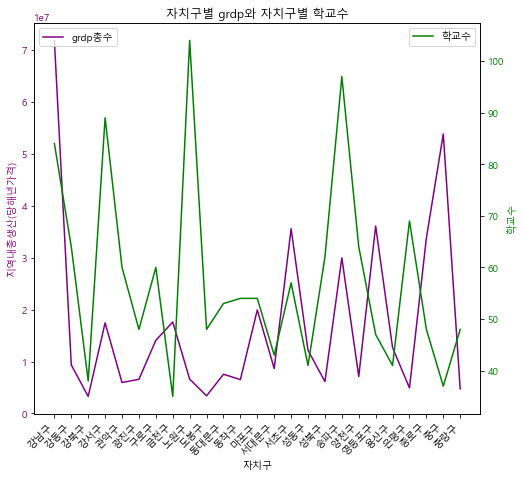

In [35]:
x = df.index
y1 = df['학교수']
y2 = df['지역내총생산(당해년가격)']

fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white')
ax1 = fig.add_subplot() ## axes 생성
 
color1 = 'purple'
ax1.plot(x, y2, color=color1)
ax1.set_xlabel('자치구')
ax1.set_ylabel('지역내총생산(당해년가격)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

color2 = 'green'
ax2 = ax1.twinx() # 새로운 y축 생성
ax2.plot(x, y1, color=color2)
ax2.set_ylabel('학교수', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.autofmt_xdate(rotation=45)# x축 45도 회전
plt.title('자치구별 grdp와 자치구별 학교수')

ax1.legend(['grdp총수'],loc='upper left') #범례 달기
ax2.legend(['학교수'],loc='upper right')
plt.show();

# grdp의 움직임에 따라서 자치구별 학교수도 같은 움직임을 나타낸다는 것을 알 수 있었다. 

#### 2. 자치구별 grdp와 자치구별 학원/교습소 수

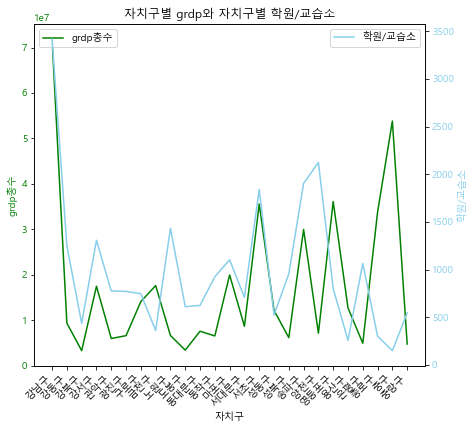

In [36]:
x = df.index
y1 = df['학원/교습소']
y2 = df['지역내총생산(당해년가격)']

fig = plt.figure(figsize=(7,7)) ## 캔버스 생성

fig.set_facecolor('white')
ax1 = fig.add_subplot() ## axes 생성
 
color1 = 'green'
ax1.plot(x, y2, color=color1)
ax1.set_xlabel('자치구')
ax1.set_ylabel('grdp총수', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
 
color2 = 'skyblue'
ax2 = ax1.twinx() # 새로운 y축 생성
ax2.plot(x, y1, color=color2)
ax2.set_ylabel('학원/교습소', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)


plt.title('자치구별 grdp와 자치구별 학원/교습소')
fig.autofmt_xdate(rotation=45)
ax1.legend(['grdp총수'],loc='upper left')
ax2.legend(['학원/교습소'],loc='upper right');

## grdp의 변동에 따라서 학원/교습소의 수도 같은 움직임을 보인다.
## 자치구별 gdp가 높은 곳일수록 학교, 학원 및 교습소 수도 많음을 그래프를 통해 확인할 수 있다.